In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(path):
    input_file = open(path)
    output_data = []
    for line in input_file:
        one_row = ['1']
        one_row += line[:-2].split(',')
        output_data.append([float(x) for x in one_row])

    print('Input data info.')
    print('\tVariable amount: %d, training set size %d' % (len(output_data[0]) - 1, len(output_data)))
    return np.array(output_data)

In [3]:
def display_convergence(data):
    convergence_plot_data = np.array(data)
    convergence_plot = plt.figure().add_subplot(111)
    plt.xlabel('Iteration, N')
    plt.ylabel('Cost function, J')
    plt.title('Cost function convergence')
    convergence_plot.plot(convergence_plot_data[:, 0], convergence_plot_data[:, 1])

In [4]:
def hyp_value(x, theta):
    return sum(np.array(x) * np.array(theta))

In [5]:
def compare_theta(a, b):
    delta = 0.000001
    for i in range(len(a)):
        if abs(a[i] - b[i]) > delta:
            return False

    return True

In [6]:
def display_regression_plot(data, hypothesis=None, labels=None):
    x_data = data[:, 1]
    y_data = data[:, 2]
    plot_regression = plt.figure().add_subplot(111)
    plot_regression.scatter(x_data, y_data, s=10)

    if labels is not None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        plt.title(labels[2])

    if hypothesis is not None:
        plot_regression.plot(x_data, hypothesis, color='red')


def display_regression_coefficients(theta):
    print('\nCalculated regression coefficients:')
    [print('\tTheta[%d]: %f' % (i, theta[i])) for i in range(len(theta))]

In [7]:
def display_results(data, theta, hypothesis=None, labels=None):
    display_regression_coefficients(theta)
    if len(data[0]) == 3:
        display_regression_plot(data, hypothesis, labels)

In [8]:
def display_all_plots():
    plt.show()

In [9]:
def compute_cost_function(x_data, y_data, theta):
    coefficient = 0.5 / len(x_data)
    hyp_data = np.array([hyp_value(x, theta) for x in x_data])
    return sum(((hyp_data - y_data) ** 2)) * coefficient

In [10]:
def compute_partial_derivative(x_data, y_data, theta, j):
    result = 0.0
    for i in range(len(x_data)):
        result += (hyp_value(x_data[i], theta) - y_data[i]) * x_data[i][j]

    return result / len(x_data)

In [11]:
def gradient_step(x_data, y_data, theta, alpha):
    return [theta[i] - alpha * compute_partial_derivative(x_data, y_data, theta, i) for i in range(len(theta))]

In [12]:
def gradient_descent(x_data, y_data, theta, alpha, iterations):
    prev_theta = list(theta)
    convergence_plot_data = []
    for i in range(1, iterations):
        theta = gradient_step(x_data, y_data, theta, alpha)
        if compare_theta(prev_theta, theta):
            print('\tEstimated iterations: %d\n' % i)
            break

        prev_theta = list(theta)
        convergence_plot_data.append([i, compute_cost_function(x_data, y_data, theta)])

    if convergence_plot_data:
        display_convergence(convergence_plot_data)
        
    return theta

In [13]:
def normalize_all(data):
    for i in range(1, len(data[0])):
        data[:, i] = scale_normalize(data[:, i])

    return data


def scale_normalize(lst):
    return lst / np.mean(lst)

In [14]:
import numpy.linalg as lin


def compute_normal_equation(x_data, y_data):
    # xT - transposed x-matrix
    x_transpose = x_data.transpose()
    # X' * X
    x_mul = x_transpose @ x_data
    # (X' * X) ** (-1)
    x_mul_inv = lin.inv(x_mul)
    # ((X' * X) ** (-1))' * X'
    x_mul_on_transpose = x_mul_inv @ x_transpose
    # ((X' * X) ** (-1))' * X' * y
    return x_mul_on_transpose @ y_data

Input data info.
	Variable amount: 3, training set size 47
Gradient params.
	Randomly generated theta vector: [0 - 0.0711] [1 - 0.6360] [2 - 0.2514] 
	Alpha:                           0.100000
	Max iteration count:             10000

Gradient descent started...


	Estimated iterations: 6987


Calculated regression coefficients:
	Theta[0]: 8959.841485
	Theta[1]: 27851.696104
	Theta[2]: -2770.346107
Input data info.
	Variable amount: 3, training set size 47

Normal equation started...

Calculated regression coefficients:
	Theta[0]: 8959.841796
	Theta[1]: 27851.696210
	Theta[2]: -2770.346516


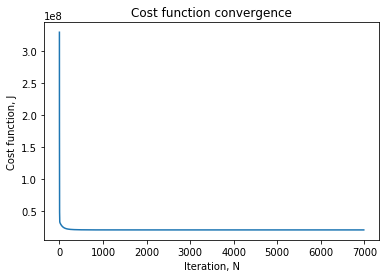

In [16]:
import random


def compute_linear_regression():
    data = load_data('demo/init/data/ex1data2.txt')

    # getting separated x and y data for descent and cost function
    # and normalization x-data
    x_data = normalize_all(data[:, :-1])
    y_data = data[:,  -1]

    # generating random start theta (or coefficients on linear regression)
    theta = [random.uniform(0, 1) for i in range(len(x_data[0]))]

    # descent speed
    # decrease alpha if:
    #   - script threw an overflow warning
    #   - J-function on plot increase instead of decrease
    # increase alpha if:
    #   - J-function on plot decrease too slow or looks like linear function
    #   - descent finished after first iteration or very fast
    #   - descent finished all iterations, but regression looks even not close to true
    # for ex1data1.txt alpha = 0.01 is perfect choice (if data not normalize)
    # for ex1data2.txt alpha = 0.01 if too big, 10**(-10) - 10**(-7) is better choice (is not normalize)
    # if data normalized alpha = 0.1 is perfect choice for both examples
    alpha = pow(10, -1)

    # if cost function not converged, descent will stop after all iterations
    iterations = 10000

    # computing gradient descent
    print('Gradient params.')
    print('\tRandomly generated theta vector: ', end='')
    [print('[%d - %.4f]' % (i, theta[i]), end=' ') for i in range(len(theta))]
    print('\n\tAlpha:                           %f' % alpha)
    print('\tMax iteration count:             %d' % iterations)
    print('\nGradient descent started...')

    # computing gradient descent
    theta = gradient_descent(x_data, y_data, theta, alpha, iterations)

    # displaying results
    # if regression with one variable plot will be displayed
    prediction = [hyp_value(x, theta) for x in x_data]
    labels = ['X-axis', 'Y-axis', 'Title']
    display_results(data, theta, prediction, labels)


def compute_regression_normal_equation():
    data = load_data('demo/init/data/ex1data2.txt')
    # data normalization for normal equation isn't necessary
    # this only for comparing results of gradient descent and normal equation
    x_data = normalize_all(data[:, :-1])
    y_data = data[:,  -1]

    print('\nNormal equation started...')
    theta = compute_normal_equation(x_data, y_data)
    prediction = [hyp_value(x, theta) for x in x_data]
    labels = ['X-axis', 'Y-axis', 'Normal equation']
    display_results(data, theta, prediction, labels)


compute_linear_regression()
compute_regression_normal_equation()
display_all_plots()